# Data Preprocessing

The following tutorial contains Python examples for data preprocessing. You should refer to the "Data" chapter of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial. 


O pré-processamento de dados consiste em um amplo conjunto de técnicas para limpeza, seleção e transformação de dados para aprimorar a análise de mineração de dados. Leia as instruções passo a passo abaixo com cuidado. Para executar o código, clique na célula correspondente e pressione as teclas SHIFT-ENTER simultaneamente.

## 4.1 Problemas de qualidade de dados

A baixa qualidade dos dados pode ter um efeito adverso na mineração de dados. Entre os problemas comuns de qualidade de dados estão ruído, valores discrepantes, valores ausentes e dados duplicados. 

Começamos com um conjunto de dados de exemplo do repositório de aprendizado de máquina da UCI que contém informações sobre pacientes com câncer de mama.


### Primeiro, faça o download do conjunto de dados usando a função Pandas read_csv() e exiba seus primeiros 5 pontos de dados, exiba o número de instâncias e de atributos.

'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

Colunas 'Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importando csv para pandas dataframe

In [3]:
df = pd.read_csv('./dados.csv', names=['sample_code','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class'])

In [4]:
df.head()

,sample_code,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Valores faltantes  (Missing Values)

Não é incomum que um objeto não tenha um ou mais valores de atributo. Em alguns casos, as informações não foram coletadas; enquanto em outros casos, alguns atributos são inaplicáveis às instâncias de dados. Esta seção apresenta exemplos das diferentes abordagens para lidar com valores ausentes.

De acordo com a descrição dos dados (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), os valores omissos são codificados como '?' Nos dados originais. 

### Agora sua tareda é converter os valores ausentes em NaNs. Podemos então contar o número de valores ausentes em cada coluna dos dados.


In [6]:
df.replace('?', np.nan, inplace=True)

In [7]:
mediana = df['bare_nuclei'].median()

Observe que apenas a coluna 'Bare Nuclei' contém valores omissos. 

### Substitua os valores ausentes na coluna "Bare Nuclei"  pelo valor mediano dessa coluna. Mostre valores antes e depois da substituição  para um subconjunto dos dados.


In [11]:
df_nan_lines = df[df.isna().any(axis=1)]
df_nan_lines

,sample_code,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [13]:
df_mediana = df.replace(np.nan, mediana)

In [14]:
df_mediana.iloc[df_nan_lines.index]

,sample_code,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,1,7,3,1,4
40,1096800,6,6,6,9,6,1,7,8,1,2
139,1183246,1,1,1,1,1,1,2,1,1,2
145,1184840,1,1,3,1,2,1,2,1,1,2
158,1193683,1,1,2,1,3,1,1,1,1,2
164,1197510,5,1,1,1,2,1,3,1,1,2
235,1241232,3,1,4,1,2,1,3,1,1,2
249,169356,3,1,1,1,2,1,3,1,1,2
275,432809,3,1,3,1,2,1,2,1,1,2
292,563649,8,8,8,1,2,1,6,10,1,4


### Em vez de substituir os valores ausentes, outra abordagem comum é descartar os pontos de dados que contêm valores ausentes. Isso pode ser feito facilmente aplicando a função dropna() ao quadro de dados. Execute essa abordagem e exiba o número de linhas antes e depois desse tratamento.


In [15]:
print("linhas com NaN: {n_linhas}".format(n_linhas=df.shape[0]))

linhas com NaN: 699


In [17]:
df_droped_nan = df.dropna()

In [18]:
print("linhas sem NaN: {n_linhas}".format(n_linhas=df_droped_nan.shape[0]))

linhas sem NaN: 683


### Outliers (Ruídos)

Os outliers são instâncias de dados com características consideravelmente diferentes do restante do conjunto de dados. 

### Utilizabdo a matplotlib, apressente um boxplot para identificar as colunas na tabela que contêm outliers. Observe que os valores em todas as colunas (exceto 'Bare Nuclei') são originalmente armazenados como 'int64', enquanto os valores na coluna 'Bare Nuclei' são armazenados como objetos de string (já que a coluna contém strings como '?' representando valores ausentes). Assim, você deve converter a coluna em valores numéricos antes de criar o boxplot. Caso contrário, a coluna não será exibida ao desenhar o boxplot.


#### Convertendo bare nuclei para int

In [65]:
df_droped_nan = df_droped_nan.astype({'bare_nuclei':'int64'}, copy=False)

#### Gerando boxplot

In [66]:
df_boxplot = df_droped_nan.drop(['sample_code','class'],axis=1)
df_boxplot.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


<AxesSubplot:>

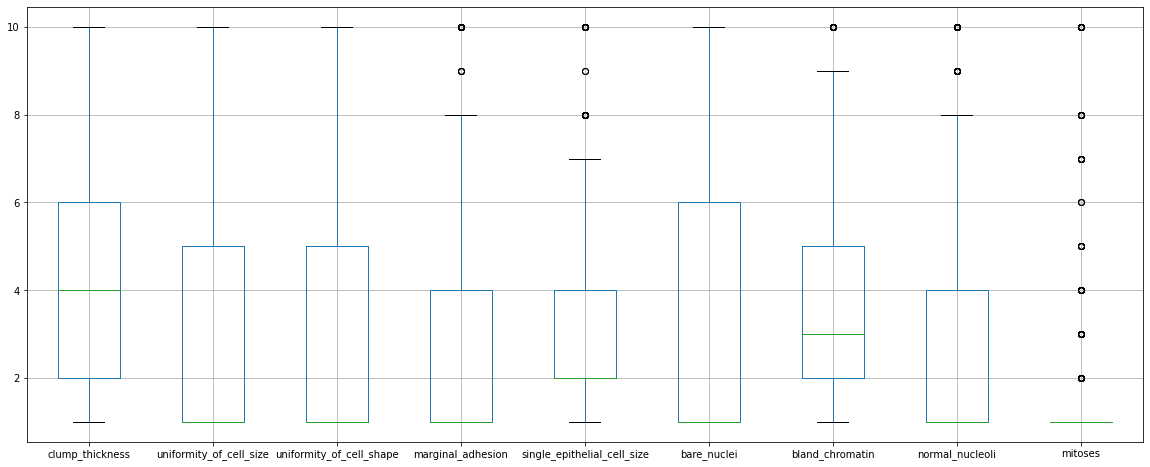

In [67]:
df_boxplot.boxplot(figsize=(20,8))

### Os boxplots devem sugerir que apenas 5 das colunas (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contêm valores anormalmente altos. Para descartar os outliers, podemos calcular a pontuação Z para cada atributo e remover as instâncias que contêm atributos com pontuação Z anormalmente alta ou baixa (por exemplo, se Z > 3 ou Z <= -3).
A pontuação Z é dada por Z=(X-Xmedio)/std, ou seja, o valor de cada atributo vai ser substitui por ele menos a média da coluna, dividido pelo desvio padrão da coluna. 
Observe que os valores omissos (NaN) não são afetados pelo processo de padronização.

In [69]:
for col in df_boxplot:
    x_medio = np.asarray(df_boxplot[col], dtype=np.float64).mean()
    desvio_padrao = np.asanyarray(df_boxplot[col], dtype=np.float64).std();
    df_boxplot[col] = (df_boxplot[col] - x_medio) / desvio_padrao

In [70]:
df_boxplot.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


### Descarte colunas com Z> 3 ou Z <= -3.

In [85]:
for col in df_boxplot:
    df_boxplot[col] = df_boxplot[(df_boxplot[col] <= 3) & (df_boxplot[col] > -3)]

In [78]:
df_boxplot = df_boxplot[(df_boxplot <= 3) & (df_boxplot > -3)]

In [86]:
print("linhas sem outliers: {n_linhas}".format(n_linhas=df_boxplot.shape[0]))

linhas sem outliers: 683


### Dados duplicados


Alguns conjuntos de dados, especialmente aqueles obtidos pela fusão de várias fontes de dados, podem conter duplicações ou instâncias quase duplicadas. O termo deduplicação é freqüentemente usado para se referir ao processo de lidar com problemas de dados duplicados.


### Verifique instâncias duplicadas no conjunto de dados de câncer de mama, apresentando o número de instâncias duplicadas

In [80]:
df_boxplot.duplicated()

0      False
1       True
2      False
3      False
4      False
       ...  
694     True
695     True
696     True
697     True
698     True
Length: 683, dtype: bool

In [82]:
df_sem_duplicados = df_boxplot[df_boxplot.duplicated() == False]

In [84]:
df_sem_duplicados.dtypes

clump_thickness                float64
uniformity_of_cell_size        float64
uniformity_of_cell_shape       float64
marginal_adhesion              float64
single_epithelial_cell_size    float64
bare_nuclei                    float64
bland_chromatin                float64
normal_nucleoli                float64
mitoses                        float64
dtype: object

### Embora essas linhas duplicadas possam corresponder a amostras para indivíduos diferentes, neste exemplo hipotético, supomos que as duplicadas são amostras obtidas do mesmo indivíduo. Remova as linhas duplicadas e mostre o número de linhas antes e depois desse processo.

## Agregação

A agregação de dados é uma tarefa de pré-processamento em que os valores de dois ou mais objetos são combinados em um único objeto. A motivação para agregação inclui (1) reduzir o tamanho dos dados a serem processados, (2) alterar a granularidade da análise (de escala fina para escala mais grosseira) e (3) melhorar a estabilidade dos dados.

Agora utilize os dados da série temporal de precipitação diária para uma estação meteorológica localizada no Detroit Metro Airport (arquivo 'DTW_prec.csv'). Os dados brutos foram obtidos do site Climate Data Online (https://www.ncdc.noaa.gov/cdo-web/). A série temporal de precipitação diária será comparada com os valores mensais.


### Carregue os dados da série temporal de precipitação

 ### Desenhe um gráfico de linha das séries temporais diárias.

### Observe que a série temporal diária parece ser bastante caótica e varia significativamente de um passo para outro.Crie séries temporais agregadas por mês para obter os valores totais mensais de precipitação. Plot a série temporal resultante, ela deve variar mais suavemente em comparação com a série temporal diária.

###  Agora agrupe e agregue por ano para obter os valores de precipitação anuais e plot o resultado.


## Sampling

Amostragem é uma abordagem comumente usada para facilitar (1) a redução de dados para análise exploratória de dados e ampliação de algoritmos para aplicações de big data e (2) quantificação de incertezas devido a distribuições de dados variáveis. Existem vários métodos disponíveis para amostragem de dados, como amostragem sem substituição, onde cada instância selecionada é removida do conjunto de dados e amostragem com substituição, onde cada instância selecionada não é removida, permitindo que ela seja selecionada mais de uma vez na amostra .


### Aplique a amostragem com substituição e sem substituição ao conjunto de dados de câncer de mama obtido no repositório de aprendizado de máquina da UCI.


### Selecione uma amostra de tamanho 3  aleatoriamente (sem substituição) dos dados originais.


### Selecione aleatoriamente 1% dos dados (sem substituição) e exiba as amostras selecionadas. 

## Por fim, realize uma amostragem com substituição para criar uma amostra cujo tamanho é igual a 1% de todos os dados. Você deve poder observar instâncias duplicadas na amostra ao aumentar o tamanho da amostra.

## Discretização

Discretização é uma etapa de pré-processamento de dados que é frequentemente usada para transformar um atributo de valor contínuo em um atributo categórico. O exemplo abaixo ilustra dois métodos de discretização simples, mas amplamente utilizados (largura igual e frequência igual), aplicados ao atributo 'Clump Thickness' do conjunto de dados de câncer de mama.

### Plot um histograma que mostra a distribuição dos valores dos atributos. A função value_counts() também pode ser aplicada para contar a frequência de cada valor de atributo.

### Para o método de largura igual, aplique a função cut() para discretizar o atributo em 4 bins de larguras de intervalo semelhantes. A função value_counts() pode ser usada para determinar o número de instâncias em cada bin.


### Para o método de frequência igual, aplique a função qcut() ppara particionar os valores em 4 compartimentos, de forma que cada bin tenha quase o mesmo número de instâncias.



**<font color='blue'>References:</font>**

1. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

2. Mangasarian, O.L. and Wolberg, W. H. (1990). "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, pp 1 & 18.

3. Wolberg, W.H. and Mangasarian, O.L. (1990). "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, pp 9193-9196. 

4. Climate Data Online [https://www.ncdc.noaa.gov/cdo-web/]. 